In [ ]:
import pandas as pd
import numpy as np
Iris=pd.read_csv("/content/Iris.csv")



In [ ]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
Iris['Species']= le.fit_transform(Iris['Species'])
  
Iris['Species'].unique()

array([0, 1, 2])

In [ ]:
X=Iris.drop(['Id','Species'],axis=1)
Y=Iris['Species']
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
from keras.utils import to_categorical
Y= to_categorical(Y)
 #y_test = to_categorical(y_test)
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
fit=mm.fit(X_train)
X_train=fit.transform(X_train)
X_test=fit.transform(X_test)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)

X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
Y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1

In [ ]:
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras import Sequential
model = Sequential()
model.add(Conv1D(500, 6, activation="relu",padding='Same', input_shape=(4,1)))


model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(1000, activation="sigmoid"))
#model.add(Dense(800, activation="softmax"))
model.add(Dense(500, activation="sigmoid"))
model.add(Dense(100, activation="sigmoid"))
model.add(Dense(3))

In [ ]:
import tensorflow as tf

opt=tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['Accuracy'])
history=model.fit(X_train,Y_train,epochs=50,batch_size=32,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/50
4/4 [==============================] - 1s 107ms/step - loss: 4.3967 - Accuracy: 0.3083 - val_loss: 5.1416 - val_Accuracy: 0.4000
Epoch 2/50
4/4 [==============================] - 0s 40ms/step - loss: 5.1416 - Accuracy: 0.3167 - val_loss: 5.1416 - val_Accuracy: 0.4000
Epoch 3/50
4/4 [==============================] - 0s 42ms/step - loss: 5.1416 - Accuracy: 0.3167 - val_loss: 5.1416 - val_Accuracy: 0.4000
Epoch 4/50
4/4 [==============================] - 0s 35ms/step - loss: 5.1416 - Accuracy: 0.3167 - val_loss: 5.1416 - val_Accuracy: 0.4000
Epoch 5/50
4/4 [==============================] - 0s 35ms/step - loss: 5.1416 - Accuracy: 0.3167 - val_loss: 5.1416 - val_Accuracy: 0.4000
Epoch 6/50
4/4 [==============================] - 0s 37ms/step - loss: 5.1416 - Accuracy: 0.3167 - val_loss: 5.1416 - val_Accuracy: 0.4000
Epoch 7/50
4/4 [==============================] - 0s 37ms/step - loss: 5.1416 - Accuracy: 0.3167 - val_loss: 5.1416 - val_Accuracy: 0.4000
Epoch 8/50
4/4 [==========

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, batch_size=50, epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
3/3 [==============================] - 0s 42ms/step - loss: 0.1210 - accuracy: 0.9833 - val_loss: 0.1010 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 32ms/step - loss: 0.1180 - accuracy: 0.9667 - val_loss: 0.1188 - val_accuracy: 0.9667
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 0.1169 - accuracy: 0.9917 - val_loss: 0.1312 - val_accuracy: 0.9333
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.1162 - accuracy: 0.9917 - val_loss: 0.1282 - val_accuracy: 0.9333
Epoch 5/100
3/3 [==============================] - 0s 38ms/step - loss: 0.1155 - accuracy: 0.9917 - val_loss: 0.1086 - val_accuracy: 0.9667
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.1131 - accuracy: 0.9833 - val_loss: 0.1271 - val_accuracy: 0.9333
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.1167 - accuracy: 0.9833 - val_loss: 0.1412 - val_accuracy: 0.9333
Epoch 8/100
3/3 [===

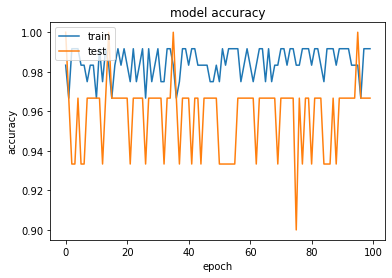

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Y_pred = model.predict(X_test)
#Y_pred=Y_pred>0.5

1/1 [==============================] - 0s 90ms/step


In [ ]:
actual = np.argmax(Y_test,axis=1)
predicted = np.argmax(Y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [0 2 2 0 1 1 1 0 2 0 0 0 2 1 1 1 0 0 2 1 2 1 1 2 2 2 1 1 0 1]
Predicted: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(actual, predicted)
cm

array([[ 0,  9,  0],
       [ 0, 12,  0],
       [ 0,  9,  0]])

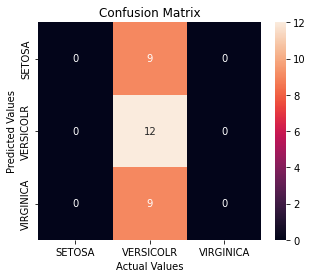

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()